# Optimal advertising

### Ad display

In this example we solve a simple optimal advertising problem in Convex.jl.
We have $m$ advertisers/ads, $i=1, \ldots, m$, and $n$ time slots, $t=1, \ldots, n$.
$T_t$ is the total traffic in time slot $t$.
$D_{it} \geq 0$ is the number of ad $i$ displayed in period $t$.

Our constraints are that $\sum_i D_{it} \leq T_t$ and that we satisfy our contracts for minimum total displays: $\sum_t D_{it} \geq c_i$.
Our goal is to choose $D_{it}$.

### Clicks and revenue

$C_{it}$ is the number of clicks on ad $i$ in period $t$.
Our click model is $C_{it} = P_{it}D_{it}$, where $P_{it} \in [0,1]$ is the fraction of displays of ad $i$ in time $t$ that translate into clicks.

We are paid $R_i>0$ per click for ad $i$, up to a budget $B_i$.
Our total ad revenue is thus

$$
S_i = \min \left\{ R_i \sum_t C_{it}, B_i\right\},
$$

a concave function of $D$.

### Ad optimization
We choose the displays to maximize revenue, i.e., we solve the optimization problem

$$
\begin{array}{ll} \mbox{maximize} & \sum_i S_i \\
\mbox{subject to} & D \geq 0, \quad D^T{\bf 1} \leq T, \quad
D {\bf 1} \geq c
\end{array}
$$

where the optimization variable is $D\in {\bf R}^{m \times n}$ and $T \in {\bf R}^n$, $c \in {\bf R}^m$, $R \in {\bf R}^m$, $B \in {\bf R}^m$, and $P \in {\bf R}^{m \times n}$ are problem data.

### Example

In the following code we generate and solve an ad optimization problem with 24 hourly periods and 5 ads (A-E).

In [5]:
# Generate data for optimal advertising problem
using Random
Random.seed!(1234);

m = 5;
n = 24;
scale = 1e4;
B = exp.(8 .+ randn(m,1)) .+ 1e4;
B = 1e3 * round.(B/1e3);

P_ad = rand(m,1);
P_time = rand(1,n);
P = P_ad * P_time;

T = sin.(range(-pi,pi,length=n))*scale;
T .+= -minimum(T) .+ scale;
c = rand(m);
c *= 0.6*sum(T)/sum(c);
c = 1e3*round.(c/1e3);
R = [exp(minimum(c)/c[i]) for i in 1:m];

In [20]:
# Form and solve the optimal advertising problem
using Convex
using SCS

D = Variable(m,n);
Si = [min(R[i]*sum(P[i,:].*D[i,:]), B[i]) for i in 1:m];
problem = maximize(sum(Si), [D>=0, (1:m)'D<=T', D*(1:n)>=c]);
solve!(problem, SCS.Optimizer(verbose=1));

----------------------------------------------------------------------------
	SCS v2.1.3 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 496, CG tol ~ 1/iter^(2.00)
eps = 1.00e-05, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-03
Variables n = 126, constraints m = 160
Cones:	primal zero / dual free vars: 1
	linear vars: 159
Setup time: 1.51e-04s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 2.85e+19  4.19e+19  6.40e-01 -9.27e+24 -2.04e+24  6.04e+24  9.67e-05 
    60| 3.28e-07  6.10e-07  2.42e-07 -6.80e+04 -6.80e+04  1.51e-12  3.14e-03 
-------------------------------------------------------------------

In [21]:
problem.status

OPTIMAL::TerminationStatusCode = 1

In [22]:
problem.optval

68000.02358972594

We plot the total traffic $T$ below.

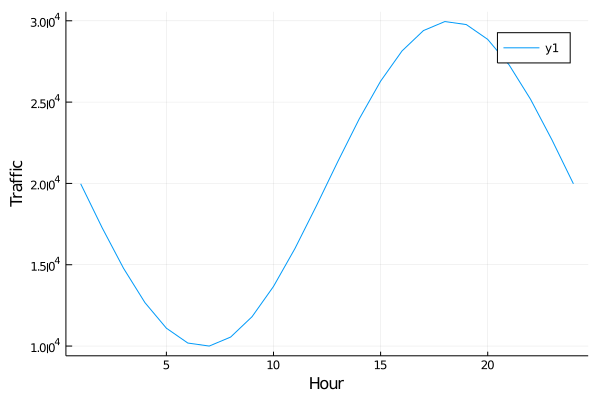

GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to un

In [27]:
using Plots
plot(T, xlabel="Hour", ylabel="Traffic")

We plot the conversion fractions $P$ below.

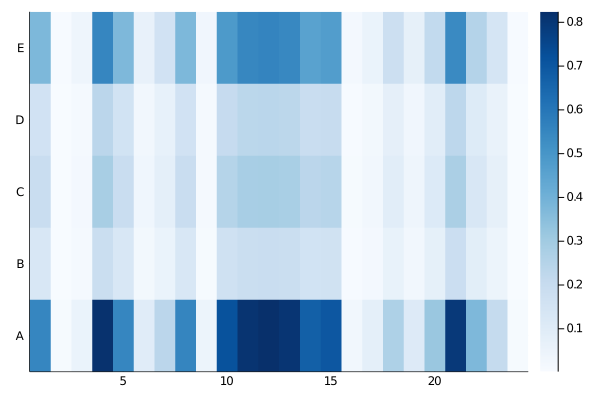

In [42]:
col_labels = split("ABCDE", "")
row_labels = 1:24

heatmap(row_labels, col_labels, P, c=:Blues_9)

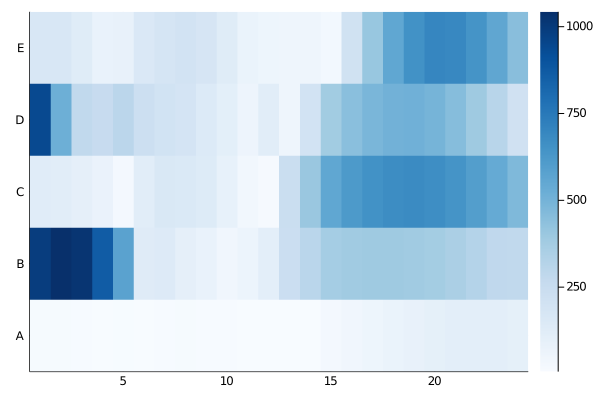

In [43]:
heatmap(row_labels, col_labels, evaluate(D), c=:Blues_9)

How do the contracted minimum total displays $c$ compare to the final displays $D$?

In [40]:
c

5-element Array{Float64,1}:
   7000.0
  71000.0
 104000.0
  43000.0
  64000.0

In [39]:
evaluate(D)*(1:n)

5-element Array{Float64,1}:
  17820.933623881043
  94010.83435190258
 134518.56112584574
  98263.76176245738
 111157.73182051562